## Yelp
Dataset from kaggle.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text_length'] = yelp['text'].apply(len)

### Analysis

In [7]:
sns.set_style('white')

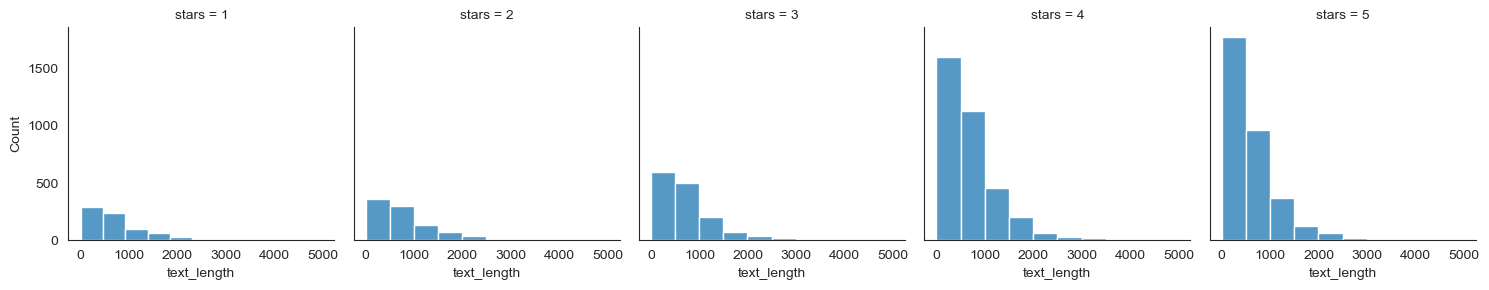

In [8]:
# 留言數與長度跟星數正相關
sns.FacetGrid(yelp, col = 'stars').map(sns.histplot, 'text_length', bins = 10)
plt.show()

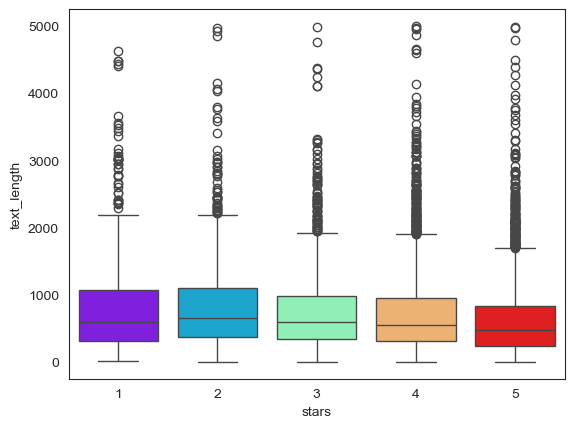

In [9]:
# 字長度與星數無太大關係
sns.boxplot(yelp, x = 'stars', y = 'text_length', 
           palette = 'rainbow', hue='stars', legend=False)
plt.show()

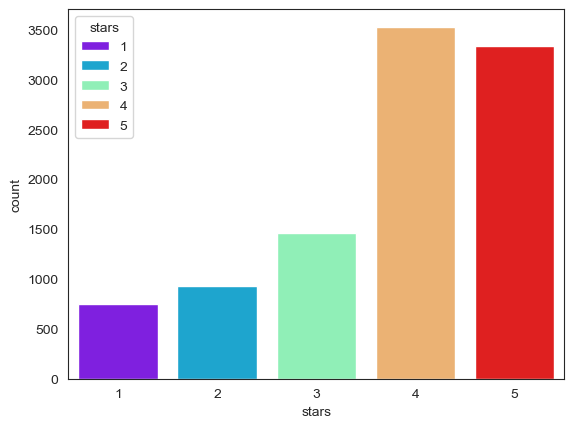

In [10]:
# 各星數數量，四星最多
sns.countplot(yelp, x = 'stars', palette = 'rainbow', hue='stars')
plt.show()

In [11]:
# 依據星數取平均
yelpInt = yelp.select_dtypes(include = 'int64')
stars = yelpInt.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
# 相關性
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


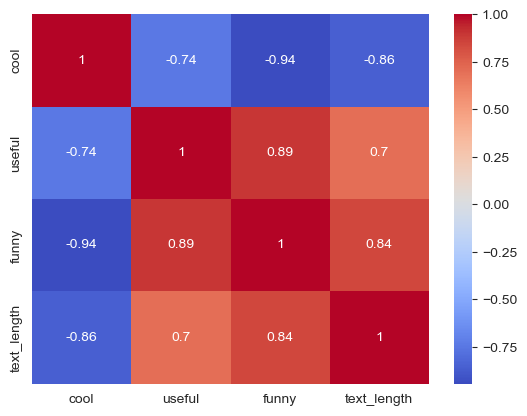

In [13]:
sns.heatmap(stars.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [14]:
X = yelp['text']
y = yelp['stars']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [16]:
X = cv.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
nb = MultinomialNB()

In [21]:
nb.fit(X_train, y_train)

MultinomialNB()

### Predict and Evaluate

In [22]:
pred = nb.predict(X_test)
pred

array([4, 4, 5, ..., 4, 4, 4])

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
print(classification_report(y_test, pred), '\n',
     confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000
 
 [[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


### pipeline: add tfidf

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline(
    [('bow', CountVectorizer()), 
#      ('tfidf', TfidfTransformer()), 
     ('model', MultinomialNB())
    ]
)
pipe

Pipeline(steps=[('bow', CountVectorizer()), ('model', MultinomialNB())])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = yelp['text']
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('model', MultinomialNB())])

In [31]:
predictions = pipe.predict(X_test)

In [32]:
print(classification_report(y_test, predictions), '\n',
     confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.67      0.32      0.43       220
           2       0.32      0.08      0.13       273
           3       0.33      0.09      0.14       443
           4       0.43      0.72      0.54      1064
           5       0.60      0.55      0.57      1000

    accuracy                           0.48      3000
   macro avg       0.47      0.35      0.36      3000
weighted avg       0.48      0.48      0.45      3000
 
 [[ 70  31  13  71  35]
 [ 16  22  39 165  31]
 [  5  10  41 345  42]
 [  7   3  25 766 263]
 [  6   3   6 438 547]]
